# Lab 10: K-means Clustering (Unsupervised Learning) 

In this session we will understand how K-means clustering algorithm works. It is an unsupervised learning algorithm that allows us to detect pattern or groups on unlabeled data. This algorithm starts with initializing a given number K of centroid and it assigns each point to the nearest centroid. After assigning all points, each centroid is updated as the centroid (mean) of points that have same label as the centroid. Then, we reassign points according to the new centroids. We repeat these steps until the algorithm converges and centroids become stable (don't move anymore).

In the first part, we will implement the K-means algorithm. Then, we will see the effect of centroids initialization and how dramatically it could affect output clusters. In last part, we will see "elbow" method used for selecting a suitable number of cluster K to use.

## Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d
%matplotlib notebook

## Part 1: Implement K-means

**Question 1: **
- Load data from "clusters_3.txt" file. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Create an array centroid of shape (3, 2) to initialize the 3 centroids with the **float** values (4,0), (4,3), (0,5).

In [2]:
# load data
# Type your code here
X =  np.loadtxt("clusters_3.txt")
print("The size of data is:",X.shape)
# Type your code here
m = X.shape[0]

# number of cluster
K = 3
print("Number of cluster to find is:",K)

# Intialize centroids and cluster assignment
# Type your code here
#center_1 = np.array([4,0])
#center_2 = np.array([4,3])
#center_3 = np.array([0,5])
centroid=np.array([[4,0],[4,3],[0,5]],dtype=float)
print(centroid.shape)
clust_x=np.zeros((m,))
centroid_hist=[np.copy(centroid)]

The size of data is: (300, 2)
Number of cluster to find is: 3
(3, 2)


**Question 2: **
- Implement the "euclidean_dist" function that calculates the euclidean distance (norm L2: square root of sum of square) between two vectors (Use axis = -1).

In [3]:
# euclidean distance
def euclidean_dist(x1,x2):
    # Type your code here
    dist = np.sum((x1-x2)**2,axis=-1)
    distance = np.sqrt(dist)
    return distance 

**Question 3: **
- Implement the cluster assignment step (inner for loop with counter "i"). It consists to assign each point to the nearest cluster centroid. Store the indice of the nearest centroid of the "m" points in "clust_x" array.    
**Hint:** You could use "euclidean_dist" function to calculate distances between each point and all the centroids.
- Implement update centroids step (inner for loop with counter "c"). It consists to calculate new centroid as the **mean** of all the points assigned to its cluster.

In [4]:
# K-means clustering algorithm
def K_means(X,clust_x,centroid,centroid_hist=[],hist=False,max_iter=10):
    k = centroid.shape[0]
    m = X.shape[0]
#     print(m)
#     print(clust_x)
#     print(centroid)
#     print(k)
#     print(m)
    for iter_ in range(max_iter):
        # Cluster assignment step
        for i in range(m):
            # Type your code here
            d=euclidean_dist(X[i,:],centroid)
            # Type your code here
            clust_x[i]=np.argmin(d)
        # Update centroids step
        for c in range(k):
            # Type your code here
            centroid[c,:]=np.mean(X[clust_x==c,:], axis=0)
        if (hist):
            centroid_hist.append(np.copy(centroid))
    if (hist):
        return centroid,centroid_hist,clust_x
    return centroid,clust_x

Let's visualize the clustered data

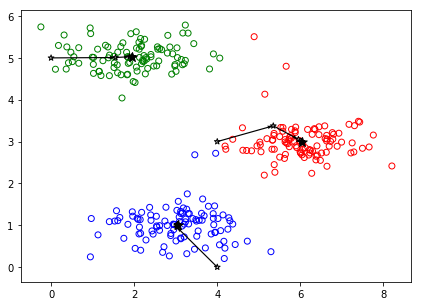

In [5]:
centroid,centroid_hist,clust_x = K_means(X,clust_x,centroid,centroid_hist,hist=True)
# visualize clusters and centroids    
plt.figure("K-means steps",figsize=(7,5))
plt.scatter(X[clust_x==0,0],X[clust_x==0,1],color="blue",marker='o',facecolors='none')
plt.scatter(X[clust_x==1,0],X[clust_x==1,1],color="red",marker='o',facecolors='none')
plt.scatter(X[clust_x==2,0],X[clust_x==2,1],color="green",marker='o',facecolors='none')
plt.scatter(centroid[:,0],centroid[:,1],color="k",marker='*',s=100)
for i in range(len(centroid_hist)-1):
    plt.scatter(centroid_hist[i][:,0],centroid_hist[i][:,1],color="k",marker='*',facecolors='none')
    #plt.plot([centroid_hist[i][:,0],centroid_hist[i+1][:,0]],[centroid_hist[i][:,1],centroid_hist[i+1][:,1]],'k--',linewidth=1)
    plt.quiver(centroid_hist[i][:,0],centroid_hist[i][:,1],centroid_hist[i+1][:,0]-centroid_hist[i][:,0],centroid_hist[i+1][:,1]-centroid_hist[i][:,1],width=.003,color='k',scale=1,scale_units='xy',angles='xy')


<font color ="red">Observation</font>:
- First, we are able to find the centroids of the clusters.
- From the centroids, we can calculate the distance to the data points. Based on the distance, we are able to allocate the positions of the datapoints to the nearest clusters

**Question 4: **
- Create an array of shape (3, 2) to initialize the 3 centroids with the **float** values (4,5), (4,3), (0,5).

In [6]:
# Intialize centroids and cluster assignment
# Type your code here
centroid=np.array([[4,5],[4,3],[0,5]],dtype=float)
clust_x=np.zeros((m,))
centroid_hist=[np.copy(centroid)]

Let's visualize the clustered data

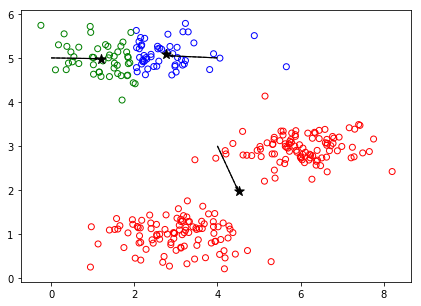

In [7]:
centroid,centroid_hist,clust_x = K_means(X,clust_x,centroid,centroid_hist,hist=True)
# visualize clusters and centroids    
plt.figure("K-means steps",figsize=(7,5))
plt.scatter(X[clust_x==0,0],X[clust_x==0,1],color="blue",marker='o',facecolors='none')
plt.scatter(X[clust_x==1,0],X[clust_x==1,1],color="red",marker='o',facecolors='none')
plt.scatter(X[clust_x==2,0],X[clust_x==2,1],color="green",marker='o',facecolors='none')
plt.scatter(centroid[:,0],centroid[:,1],color="k",marker='*',s=100)
for i in range(len(centroid_hist)-1):
    #plt.scatter(centroid_hist[i][:,0],centroid_hist[i][:,1],color="k",marker='*',facecolors='none')
    plt.plot([centroid_hist[i][:,0],centroid_hist[i+1][:,0]],[centroid_hist[i][:,1],centroid_hist[i+1][:,1]],'k--',linewidth=1)
    plt.quiver(centroid_hist[i][:,0],centroid_hist[i][:,1],centroid_hist[i+1][:,0]-centroid_hist[i][:,0],centroid_hist[i+1][:,1]-centroid_hist[i][:,1],width=.003,color='k',scale=1,scale_units='xy',angles='xy')

<font color ="red">Observation</font>:
- In this case, with 3 random centroids, we are able to determin which clusters they belongs to.
- By calcualte the distance of the centroids to the nearest points around them
- The point will be the centroid of a cluster if the distance of the point to other points in the clusters are smallest

### Random initialization of centroids

We see that the final clustering result depend a lot of used initial centroids. It could also change a lot even with few modification in the centroid initialization. Hence, We will randomly initialize centroids and run K-means algorithm several time then we will take the best run. In order to compare different runs and select the best one we calculate a error function that reflect how well is the final clustering. This error is equal to the sum of square error (euclidean distance) between all point and their corresponding cluster centroid. It is given by:
$$cluster\_error(clust\_x,centroid)=\frac{1}{m} \left \| x-centroid(x) \right \|^2$$
where:  $\left \| x \right \|^2=\sum_{j=1}^nx_j^2$ 

**Question 5: **
- Initialize the minimum error "Jmin" with +infinity.  
**Hint:** You could use numpy.inf value.

In [8]:
# initialize some variable
centroid = np.zeros((K,X.shape[1]))
clust_x = np.zeros((m,),dtype=int)
centroid_min = np.zeros((K,X.shape[1]))
clust_x_min = np.zeros((m,),dtype=int)
# Type your code here
Jmin = +np.inf

**Question 6: **
- Initialize "centroid" with random K point from original data "X".  
**Hint:** You could generate a [random permutation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html) vector of size "m". Then, extract from it first K element to index lines of matrix "X" and put results in "centroid" variable.
- Calculate the error function "J" according to the equation given above.
- In "if (J < Jmin)" statement assign the suitable value for "Jmin", "centroid_min" and "clust_x_min" variables.

In [19]:
# K-means with random initialization and  multiple runs
def K_means_multi_run(X,centroid,clust_x,centroid_min,clust_x_min,Jmin,monte_carlo=100):
    m = X.shape[0]
    k = centroid.shape[0]
    for p in range(monte_carlo):
        # Type your code here
        rand_perm = np.random.permutation(m)
#         print(rand_perm)
        centroid = X[rand_perm[:k],:]
        centroid, clust_x = K_means(X,clust_x,centroid)
        # error function
        # Type your code here
        J = np.sum((euclidean_dist(X,centroid[clust_x]))**2)
        if(J<Jmin):
            # Type your code here
            Jmin = J
            centroid_min = centroid
            clust_x_min = clust_x
    return centroid_min,clust_x_min,Jmin

In [20]:
centroid_min,clust_x_min,Jmin = K_means_multi_run(X,centroid,clust_x,centroid_min,clust_x_min,Jmin)
print("The minimum error is:",Jmin)
print("it was get for the following cluster centroids:\n",centroid_min)


The minimum error is: 1232.551624996661
it was get for the following cluster centroids:
 [[ 4.03699742  1.04452056]
 [-0.89571034  6.12902247]
 [ 6.57141767  0.65171494]
 [ 1.64342079  8.49079098]
 [ 1.51896505  0.35390797]
 [ 9.43100806 -2.49204016]
 [ 1.24205698  4.20570635]
 [-1.6788118   2.59317511]
 [-1.12223881  8.51398374]]


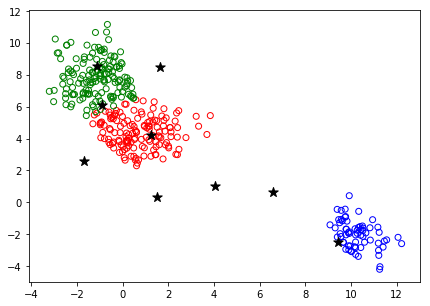

In [21]:
# plot final clusters and centroids
plt.figure("K-means with multiple runs",figsize=(7,5))
plt.scatter(X[clust_x_min==0,0],X[clust_x_min==0,1],color="blue",marker='o',facecolors='none')
plt.scatter(X[clust_x_min==1,0],X[clust_x_min==1,1],color="red",marker='o',facecolors='none')
plt.scatter(X[clust_x_min==2,0],X[clust_x_min==2,1],color="green",marker='o',facecolors='none')
plt.scatter(centroid_min[:,0],centroid_min[:,1],color="black",marker='*',s=100)

## Part 2: Choose the number of cluster K
We are in the case of unsupervised learning and we don't known labels or number cluster in our data. However, K-mean clustering algorithm need to known in advance the number of cluster K. Hence, we will run K-means for different number of cluster K and we will choose the number that reasonable performance and error. 

**Question 1: **
- Use [make_bolbs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function from sklearn library to generate some random clusters. Use the following argument:  
n_samples=1000, n_features=2, centers=7, cluster_std=1.2 and random_state=0 

In [22]:
# generate clusters
# Type your code here
X, y = make_blobs(n_samples=1000, n_features=2, centers=7, cluster_std=1.2, random_state=0)

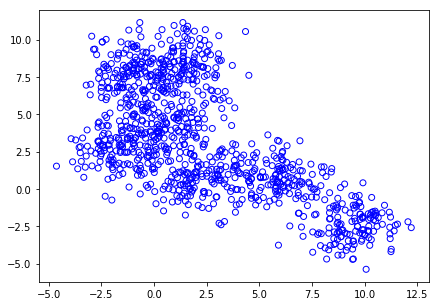

In [23]:
# plot clusters
plt.figure("More clusters",figsize=(7,5))
plt.scatter(X[:,0],X[:,1],color="blue",marker='o',facecolors='none')


In [24]:
m=X.shape[0]
K_max=10
error_list=[]

# initialize some variable
clust_x = np.zeros((m,),dtype=int)
clust_x_min = np.zeros((m,),dtype=int)

**Question 2: **
- Call "K_means_multi_run" function to calculate "centroid_min", "clust_x_min" and "Jmin".
- Add the value of minimum error "Jmin" to the "error_list".
- From the error graph can you deduce the best number of cluster?  

**Warning:** This block of code may take 1 to 2 minutes to run. Please be patient.

Run K-means clustering with K = 3


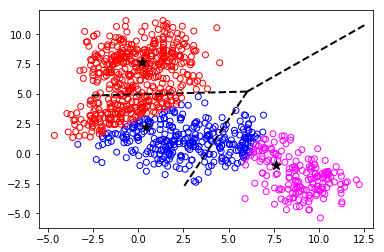

The error list is:  [6249.157545604018]
Run K-means clustering with K = 4


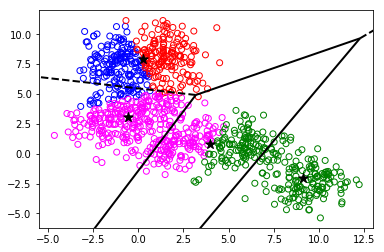

The error list is:  [6249.157545604018, 4236.304309850657]
Run K-means clustering with K = 5


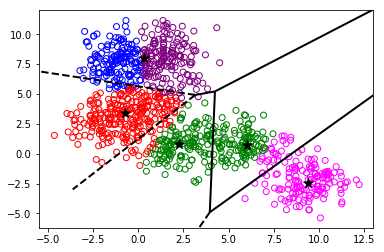

The error list is:  [6249.157545604018, 4236.304309850657, 3431.907178086489]
Run K-means clustering with K = 6


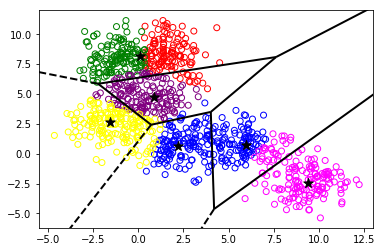

The error list is:  [6249.157545604018, 4236.304309850657, 3431.907178086489, 2813.3108305955657]
Run K-means clustering with K = 7


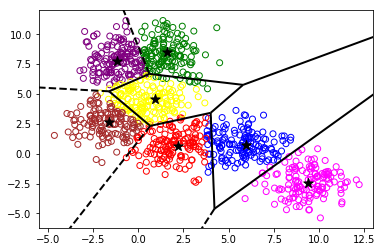

The error list is:  [6249.157545604018, 4236.304309850657, 3431.907178086489, 2813.3108305955657, 2268.666240846749]
Run K-means clustering with K = 8


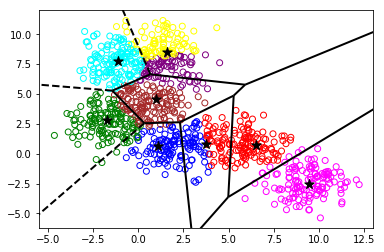

The error list is:  [6249.157545604018, 4236.304309850657, 3431.907178086489, 2813.3108305955657, 2268.666240846749, 2073.173016541238]
Run K-means clustering with K = 9


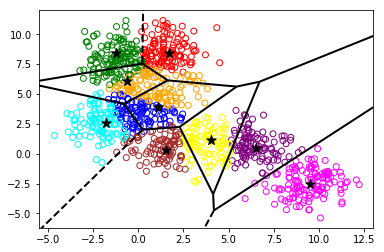

The error list is:  [6249.157545604018, 4236.304309850657, 3431.907178086489, 2813.3108305955657, 2268.666240846749, 2073.173016541238, 1888.2994963122037]


In [25]:
K_max=10
color_list=['blue','red','magenta','green','purple','yellow','brown','cyan','orange']
for k in range(3,K_max):
    print("Run K-means clustering with K =",k)
    centroid = np.zeros((k,X.shape[1]))
    centroid_min = np.zeros((k,X.shape[1]))
    Jmin=np.inf 
    # Type your code here
    centroid_min,clust_x_min,Jmin = K_means_multi_run(X,centroid,clust_x,centroid_min,clust_x_min,Jmin)
    d_max=np.zeros((k))
    vor = Voronoi(centroid_min)
    fig=voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='black',line_width=2, line_alpha=1)#voronoi_plot_2d(vor)
    plt.axis((-5.5, 13, -6.2, 12))
    for i in range (k):
        plt.scatter(X[clust_x_min==i,0],X[clust_x_min==i,1],color=color_list[i],marker='o',facecolors='none')
    plt.scatter(centroid_min[:,0],centroid_min[:,1],color="black",marker='*',s=100)
    plt.show()
    # Type your code here
    error_list.append(Jmin)
    print("The error list is: ",error_list)
    

Clustering error for different value of K are  [6249.157545604018, 4236.304309850657, 3431.907178086489, 2813.3108305955657, 2268.666240846749, 2073.173016541238, 1888.2994963122037]


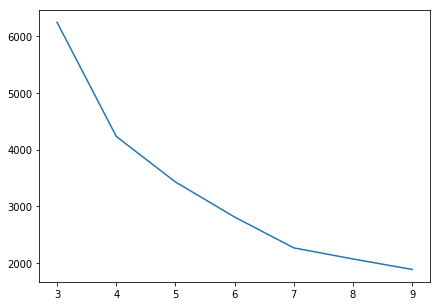

In [26]:
print("Clustering error for different value of K are ",error_list)
plt.figure("clustering error vs number of cluster K",figsize=(7,5))
plt.plot(np.arange(3,K_max),error_list)

<font color ="red">Observation</font>:
- To choose the best value of K, we can take the look at both figures. The first figure is by visualization and shows how the cluster divided. The second one show the error related to value of K.
- In the figure 1, which show the clusters, we can see that with value eauql to 7, we can get divide the clusters into most accurately. The centroid is also the in most centre of the cluster.
- In the figure 2, when K is equal to 7, the slop of the error has been reduced alot., the error becomes smaller.
- Therefore, K = 7 is the most suitable value for this dataset.
